In [1]:
import pandas as pd
import numpy as np

In [2]:
cc_info = pd.read_csv('./data/cc_info.csv')
transactions = pd.read_csv('./data/transactions.csv')

In [3]:
cc_info.shape, transactions.shape

((984, 5), (294588, 5))

In [5]:
cc_info.columns

Index([u'credit_card', u'city', u'state', u'zipcode', u'credit_card_limit'], dtype='object')

In [6]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat'], dtype='object')

In [7]:
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [8]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [14]:
# Convert date to datetime type
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
transactions['date'].dt.year.value_counts()

2015    294588
Name: date, dtype: int64

In [17]:
transactions['date'].dt.month.value_counts()

8     99167
9     96026
10    95014
7      4381
Name: date, dtype: int64

In [18]:
transactions['date'].dt.day.value_counts()

1     10530
15    10426
10    10425
8     10338
29    10321
22    10291
9     10253
16    10196
7     10195
17    10182
2     10171
23    10117
3     10054
24     9989
14     9888
28     9887
11     9871
21     9830
18     9809
4      9673
25     9646
19     8877
5      8876
27     8804
26     8794
12     8789
6      8783
20     8751
13     8629
31     6445
30     5748
Name: date, dtype: int64

In [19]:
transactions['date'].dt.weekday.value_counts()

4    66386
3    53778
5    51940
2    36290
6    30139
1    29512
0    26543
Name: date, dtype: int64

In [25]:
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['weekday'] = transactions['date'].dt.weekday

In [26]:
cc_transactions = pd.merge(transactions, cc_info, how='inner', on='credit_card')

In [27]:
cc_transactions.shape

(294588, 13)

In [28]:
cc_transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,weekday,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,4,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,5,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,0,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,3,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,0,Houston,PA,15342,20000


In [31]:
total_by_card = transactions.groupby(['credit_card','month'])['transaction_dollar_amount'].sum()

In [33]:
total_by_card = total_by_card.reset_index()

In [35]:
total_by_card.head()

,credit_card,month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43


In [38]:
total_by_card.shape

(3797, 3)

### List of users (credit card number) that never went above credit card limit each month

In [36]:
total_not_limit = pd.merge(total_by_card, cc_info, how='inner', on='credit_card')

In [37]:
total_not_limit.shape

(3797, 7)

In [40]:
def f_over_limit(row):
    if row['credit_card_limit'] < row['transaction_dollar_amount']:
        return True
    else:
        return False

total_not_limit['overlimit'] = total_not_limit.apply(f_over_limit, axis=1)

In [41]:
total_not_limit.head()

,credit_card,month,transaction_dollar_amount,city,state,zipcode,credit_card_limit,overlimit
0,1003715054175576,7,162.56,Houston,PA,15342,20000,False
1,1003715054175576,8,8441.51,Houston,PA,15342,20000,False
2,1003715054175576,9,11281.56,Houston,PA,15342,20000,False
3,1003715054175576,10,8954.21,Houston,PA,15342,20000,False
4,1013870087888817,7,281.43,Washington,NH,3280,15000,False


In [42]:
total_not_limit.overlimit.value_counts()

False    3571
True      226
Name: overlimit, dtype: int64

In [47]:
overlimit_user = total_not_limit.groupby('credit_card')['overlimit'].any()

In [48]:
overlimit_user.shape, 

((984,),)

In [49]:
overlimit_user.head()

credit_card
1003715054175576    False
1013870087888817    False
1023820165155391    False
1073931538936472    False
1077622576192810    False
Name: overlimit, dtype: bool

In [50]:
overlimit_user.value_counts()

False    862
True     122
Name: overlimit, dtype: int64

In [52]:
overlimit_user[overlimit_user==True][:5]

credit_card
1106824181265726    True
1175962294549313    True
1190980117697422    True
1246716439259317    True
1280981422329509    True
Name: overlimit, dtype: bool

In [54]:
cc_info[cc_info.credit_card==1106824181265726]

,credit_card,city,state,zipcode,credit_card_limit
172,1106824181265726,Washington,NH,3280,6000


In [57]:
total_by_card[total_by_card.credit_card==1106824181265726]

,credit_card,month,transaction_dollar_amount
31,1106824181265726,7,90.87
32,1106824181265726,8,6734.92
33,1106824181265726,9,7419.42
34,1106824181265726,10,7483.05


In [58]:
never_over_limit_users = overlimit_user[overlimit_user==False].index

### Build function that for each day, return list of users that went above monthly credit card limit on that day

In [61]:
total_by_card.head()

,credit_card,month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43


### Fraud detection Unsupervised

In [66]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [65]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday'],
      dtype='object')

In [62]:
cc_transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday', u'city', u'state', u'zipcode',
       u'credit_card_limit'],
      dtype='object')

In [ ]:
# Split training and test set (split by month)

In [69]:
transactions['hour'] = transactions.date.dt.hour

In [71]:
transactions.columns

Index([u'credit_card', u'date', u'transaction_dollar_amount', u'Long', u'Lat',
       u'year', u'month', u'day', u'weekday', u'hour'],
      dtype='object')

In [72]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ead33d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fce7310>]], dtype=object)

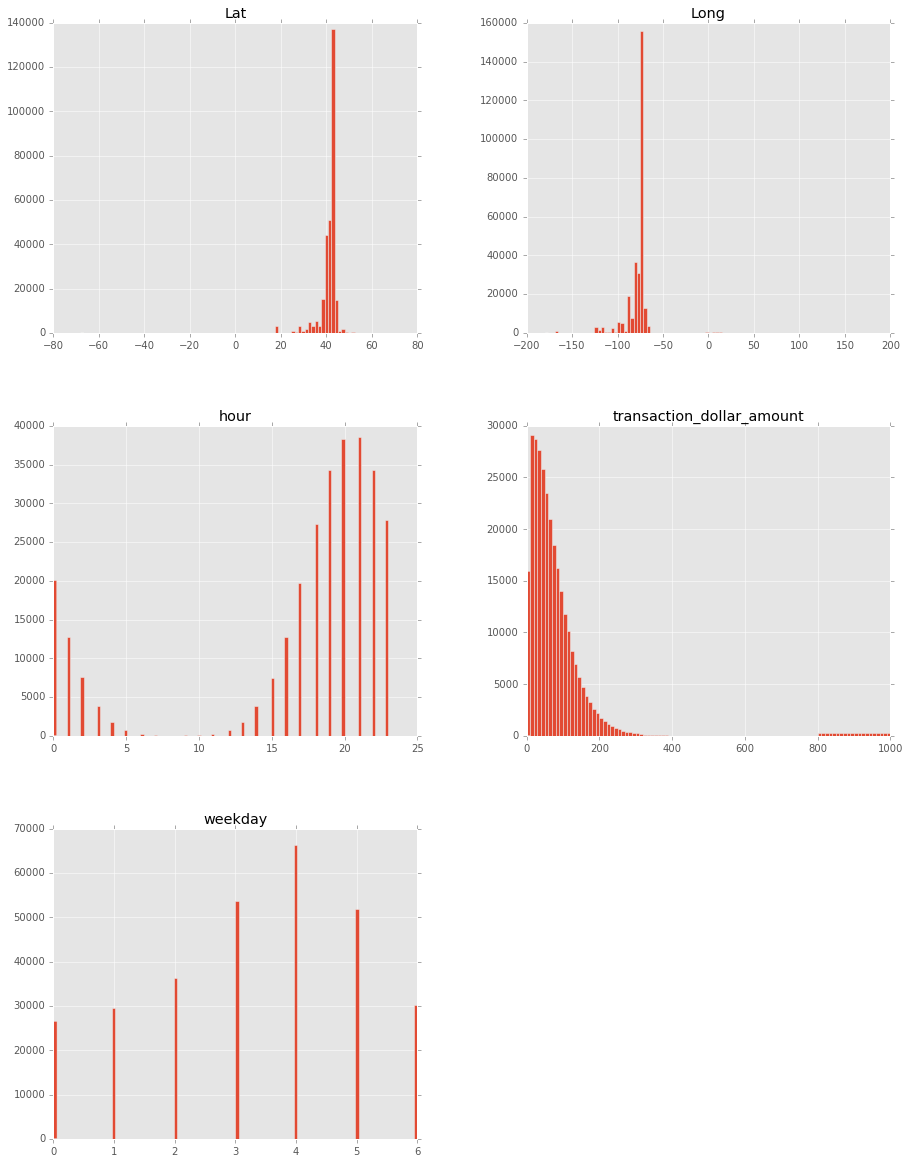

In [81]:
import matplotlib
matplotlib.style.use('ggplot')
features = ['transaction_dollar_amount','Long','Lat','weekday','hour']
transactions[features].hist(stacked=False, bins=100, figsize=(15,20), layout=(3,2))